# Show me your plate and I tell you who you are

#### Unified Package Loading Prelude

In [134]:
import pickle as pkl 
import pandas as pd 
import numpy as np 
import statsmodels as sml
import math 
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from dtreeviz.trees import dtreeviz 
from tqdm import tqdm
import itertools as it 
from dtreeviz.trees import dtreeviz

In [2]:
### In Case we need it, load using the GeoPandas Kernel
import geopandas as gpd

In [3]:
### Association Rule Mining Packags
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule


#### Doing an inverse Margaret Thatcher (Not reviving Irish though)

In [4]:
# Simple adaptable Model Pipeline Factory
def pipeline_factory(scaler, model, x_train, y_train, verbose = True):
    
    pipeline = Pipeline(steps = [
        ('scaler',  scaler),
        ('regressor',   model)
        ], verbose = verbose)
        
    pipeline.fit(x_train,y_train)
    return pipeline


In [5]:
# Generates Correlation Bar plots for different input parameters
# Returns a Fig and can optionally automaically write to the Website HTML Plot Repo. (Automatic Commit, Pull, Push and Deployment WIP) 
# Still need to Add Plot to index.md in later case, for it to show.

def bar_plot_factory(dataframe,category_socio_economics, category_nutrion, html_name = "", output_html = False, auto_commit = False):
    
    # Make a double column plot for more than 3 categories
    if len(category_socio_economics) > 3:
        cols = 2 
        rows = math.ceil(len(category_socio_economics)/2)
    else:
        cols = 1
        rows = len(category_socio_economics)
    
        
    fig = make_subplots(rows=rows, cols=cols,subplot_titles=([label_processor(x) for x in category_socio_economics]))
                                                             
    for cat_soc, index in zip(category_socio_economics, it.product(range(1, rows + 1), range(1, cols + 1))) :
       
        correl = [(nutr, stats.spearmanr(a = dataframe[cat_soc], b = dataframe[nutr]).correlation) for nutr in category_nutrion if stats.spearmanr(a = dataframe[cat_soc], b = dataframe[nutr]).pvalue < 0.05]

        fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] >= 0], y=[c[1] for c in correl if c[1] >= 0],
                            marker_color= color_tesco_blue,
                            name='positives'), row = index[0], col = index[1])

        fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] < 0], y=[c[1] for c in correl if c[1] < 0],
                            marker_color= color_tesco_red,
                            name='negatives'), row = index[0], col = index[1])
    
        fig.update_layout(showlegend=False)
        
        
    if output_html:
        print("Writing HTML to Repo...")
        fig.write_html("../fierceeagle.github.io/_includes/"+ html_name+".html")
        print("Ave Imperator, morituri te salutant")
        
        # Calling Systems Command in a Jupyter Notebook (Trust me I am an Engineer)
        if auto_commit: 
            %cd -q ../fierceeagle.github.io/
            # Adds the Plot if new Name
            print("Adding new Files ...")
            !git add *.html
            print("Commiting Changes ...")
            !git commit -m"Added/Changed Plot" --quiet
            print("Pulling previous Changes ... ")
            !git pull --quiet
            print("Pushing to Remote...")
            !git push --quiet
            print("Finished")
    
    return fig

In [6]:
# Genrates an interactive 3D Plot and generate an HTML 
def three_D_plot_factory(dataframe,x_axis, y_axis, z_axis,quantiles, aggfunc, title = "", x_title ="",  y_title = "", z_title = "", html_name = "", output_html = False, auto_commit = False):
    
    slice_df = dataframe[[x_axis] + [y_axis] + [z_axis]].copy()
    slice_df[x_axis] = pd.qcut(x = slice_df[x_axis], q = quantiles)
    slice_df[y_axis] = pd.qcut(x = slice_df[y_axis], q = quantiles)
    pivot_slice_df = slice_df.pivot_table(index = x_axis,columns = y_axis, values = z_axis, aggfunc = aggfunc)

    imputer = KNNImputer(n_neighbors=3)
    pivot_slice_df = pd.DataFrame(imputer.fit_transform(pivot_slice_df), columns = pivot_slice_df.columns, index = pivot_slice_df.index)
    fig = go.Figure(
        data=go.Surface(z=pivot_slice_df.values),
            layout=go.Layout(
            ))

    fig.update_layout(
            title=title,
            scene = dict(
                        xaxis = dict(
                            title = x_title,
                            nticks = len(pivot_slice_df.columns.tolist()),
                            tickvals = list(range(len(pivot_slice_df.columns.tolist()))), 
                            ticktext= ["{:.1f}".format((x.left + x.right)/2) for x in pivot_slice_df.columns.tolist()]),
                        yaxis = dict(
                            title = y_title,
                            nticks = len(pivot_slice_df.index.tolist()),
                            tickvals = list(range(len(pivot_slice_df.index.tolist()))), 
                            ticktext= ["{:.0f}".format((x.left + x.right)/2) for x in pivot_slice_df.index.tolist()]),
                        zaxis_title= z_title),
                        margin=dict(r=40, b=40, l=40, t=40)
            )
        
    if output_html:
        print("Writing HTML to Repo...")
        fig.write_html("../fierceeagle.github.io/_includes/"+ html_name+".html")
        print("Ave Imperator, morituri te salutant")
        
        # Calling Systems Command in a Jupyter Notebook (Trust me I am an Engineer)
        if auto_commit: 
            %cd -q ../fierceeagle.github.io/
            # Adds the Plot if new Name
            print("Adding new Files ...")
            !git add *.html
            print("Commiting Changes ...")
            !git commit -m"Added/Changed Plot" --quiet
            print("Pulling previous Changes ... ")
            !git pull --quiet
            print("Pushing to Remote...")
            !git push --quiet
            print("Finished")
    
    return fig

In [7]:
# Genrates an interactive 3D Plot and generate an HTML 
def three_D_multi_plot_factory(dataframe,x_axis, y_axis, category_z ,quantiles, aggfunc, title = "", x_title ="",  y_title = "", z_title = ["",""], html_name = "", output_html = False, auto_commit = False):
    
    if len(category_z) > 3:
        cols = 2 
        rows = math.ceil(len(category_z)/2)
        [[{'is_3d': True},{'is_3d': True}] for x in range(rows)]
    else:
        cols = len(category_z)
        rows = 1
        specs = [[{'is_3d': True} for x in range(cols)]]
        
    fig = make_subplots(rows=rows, cols=cols,subplot_titles=([label_processor(x)for x in category_z]), specs= specs, shared_xaxes = True, shared_yaxes = True)

    for z_axis, index in zip(category_z, it.product(range(1, rows + 1), range(1, cols + 1))) :
        slice_df = dataframe[[x_axis] + [y_axis] + [z_axis]].copy()
        slice_df[x_axis] = pd.qcut(x = slice_df[x_axis], q = quantiles)
        slice_df[y_axis] = pd.qcut(x = slice_df[y_axis], q = quantiles)
        pivot_slice_df = slice_df.pivot_table(index = x_axis,columns = y_axis, values = z_axis, aggfunc = aggfunc)

        imputer = KNNImputer(n_neighbors=3)
        pivot_slice_df = pd.DataFrame(imputer.fit_transform(pivot_slice_df), columns = pivot_slice_df.columns, index = pivot_slice_df.index)
        
        fig.add_trace(go.Surface(
                      z   = pivot_slice_df.values,
                      showlegend= False,
                      showscale=False,
                      ),row = index[0], col = index[1])
            
    fig.update_layout(title = title, 
                          scene = dict(
                                xaxis = dict(
                                    title = x_title,
                                    nticks = len(pivot_slice_df.columns.tolist()),
                                    tickvals = list(range(len(pivot_slice_df.columns.tolist()))), 
                                    ticktext= ["{:.1f}".format((x.left + x.right)/2) for x in pivot_slice_df.columns.tolist()]),
                                yaxis = dict(
                                    title = y_title,
                                    nticks = len(pivot_slice_df.index.tolist()),
                                    tickvals = list(range(len(pivot_slice_df.index.tolist()))), 
                                    ticktext= ["{:.0f}".format((x.left + x.right)/2) for x in pivot_slice_df.index.tolist()]),
                                zaxis_title= z_title),
                          margin=dict(r=40, b=40, l=40, t=40)) 
    
    fw=go.FigureWidget(fig)
    
    # So akward, but works better than everything else I tried.
    with fw.batch_update():
        for x in range(1,len(category_z)+1):
            fw.layout["scene" + str(x)] = scene = dict(
                                              xaxis = dict(
                                                title = x_title,
                                                nticks = len(pivot_slice_df.columns.tolist()),
                                                tickvals = list(range(len(pivot_slice_df.columns.tolist()))), 
                                                ticktext= ["{:.1f}".format((x.left + x.right)/2) for x in pivot_slice_df.columns.tolist()]),
                                              yaxis = dict(
                                                title = y_title,
                                                nticks = len(pivot_slice_df.index.tolist()),
                                                tickvals = list(range(len(pivot_slice_df.index.tolist()))), 
                                                ticktext= ["{:.0f}".format((x.left + x.right)/2) for x in pivot_slice_df.index.tolist()]),
                                              zaxis_title= z_title) 
                 
    if output_html:
        print("Writing HTML to Repo...")
        fig.write_html("../fierceeagle.github.io/_includes/"+ html_name+".html")
        print("Ave Imperator, morituri te salutant")
        
        # Calling Systems Command in a Jupyter Notebook (Trust me I am an Engineer)
        if auto_commit: 
            %cd -q ../fierceeagle.github.io/
            # Adds the Plot if new Name
            print("Adding new Files ...")
            !git add *.html
            print("Commiting Changes ...")
            !git commit -m"Added/Changed Plot" --quiet
            print("Pulling previous Changes ... ")
            !git pull --quiet
            print("Pushing to Remote...")
            !git push --quiet
            print("Finished")
    
    return fw

#### Defining some support functions making all the String Processing we need once and never again

In [8]:
## Process a column Label to Look nice in a Plot
def label_processor(label): 
    
    # eth columns
    if "ethnicity" in label:
        label = label.split("ethnicity_")[1].replace("_2011", "").capitalize()
        
        if "Bame" in label: 
            label = label.replace("Bame", "BAME")
        if "Other" in label:
            label = label.replace("Other", "Other Ethnicites")
        
    # edu columns
    elif "qualification" in label:
        label = label.replace("qualification_", "", 1).replace("_2011", "").replace("_", " ").capitalize() 
        
        if "Level" in label:
            label = label + " Qualification"
    # income columns  
    elif "annual" in label: 
        label = label.split("annual_")[1].replace("_", " ").capitalize()
        
    elif label in nutrients:
        label = label.split("_")[1].capitalize()
        
    elif label in products:
        label = " ".join([x.capitalize() for x in label.replace("f_", "").split("_")])
        
    return label    

In [9]:
# Generating the new column names using Lucas 
def get_cleaned_column_names(df, is_ward = False):
    
    year_strings = range(1990,2021)
    year_strings = [str(val) for val in year_strings]

    ethnic_groups = ["White","Mixed","Asian","Black","BAME", "Other"]

    ward_ethnic_groups_5 = ["White","Mixed","Asian or Asian British","Black or Black British","Other"]

    ward_ethnic_groups_18 = ["White British","White Irish","White Gypsy or Irish Traveller","Other White",
                             "Mixed White and Black Caribbean","Mixed White and Black African",
                             "Mixed White and Asian", "Other Mixed","Indian","Pakistani","Bangladeshi",
                             "Chinese","Other Asian","Black Caribbean","Black African","Other Black",
                             "Arab","Other Ethnic Group"]

    employment_types = ["Total","Employee","Self-employed","Unemployed","student"]

    qualifications = ["Level 1", "Level 2", "Level 3", "Level 4", "Apprenticeship", 
                      "No qualification","Other qualifications","students"]

    religions = ["Christian","Buddhist","Hindu","Jewish","Muslim","Sikh",
             "Other religion","No religion","Religion not stated"]
    
    income = ["Mean Annual","Median Annual"]

    dismiss_words = ["Population Estimates", "Density", "Health", "Transport", 
                     "Car or van", "Household Composition", "All households", "All Households", "Dwelling type", 
                     "Road Casualties","Tenure","Lone Parents", "Adults in Employment",
                     "Child Benefit", "Incidence of Cancer","Life Expectancy",
                     "Low Birth Weight Births","Obesity","Central Heating","Income Deprivation",
                     "Age Structure", "Mid-year Estimate", "Land Area", "Births and deaths",
                     "Population and Age","Home repossessions","Household composition","Number of properties sold",
                     "dwellings sold during year","Dwellings and Council tax","Property Type","Size of dwellings",
                     "Property build period", "Crime", "Ambulance","Childhood Obesity Prevalence", "Air Emissions",
                     "Land Use","Car access","Travel to work by bicycle","of LSOAs in worst","Nat Insurance",
                     "Election turnout","Workplace employment","Binge Drinking","A-Level Point Scores",
                     "Average GCSE capped","Pupil Absence","Out-of-Work Families","Fires","Access to green space and nature",
                     "Indices of Deprivation","Children in Poverty","Jobseekers Allowance","Benefits claimants",
                     "Happiness and Well-being","Lone Parent Not in Employment","Adults not in Employment"]

    new_col_names = []
    old_col_names = []

    for col_name in df.columns:
        new_name = ""
        for word in dismiss_words:
            if word in col_name:
                new_name += "YEET_"       
    
        # catch percentage
        if "%" in col_name or "(rates)" in col_name or "(Percentages)" in col_name:
            new_name += "perc_"
    
        # catch ethnic groups
        if "Ethnic Group" in col_name:
            new_name += "ethnicity_"
            if "5 groups" in col_name:
                new_name += "5_groups_"
                for group in ward_ethnic_groups_5:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
            if "18 groups" in col_name:
                new_name += "18_groups_"
                for group in ward_ethnic_groups_18:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
            if not is_ward:    
                for group in ethnic_groups:
                    if group in col_name:
                        new_name += group.lower().replace(" ","_") + "_"
    
        # country of birth
        if "Country of Birth" in col_name:
            if "Not" in col_name:
                new_name += "not_uk_born_"
            else:
                new_name += "uk_born_"
    
        # languages
        if "Language" in col_name:
            new_name += "language_"
            if "at least one" in col_name:
                new_name += "has_+16_english_speaker_"
            else:
                new_name += "has_not_+16_english_speaker_"
    
        # religion
        if "Religion" in col_name:
            new_name += "religion_"
            for religion in religions:
                if religion in col_name:
                    new_name += religion.lower().replace(" ","_") + "_"
    
        # house prices
        if "House Prices" in col_name:
            if "Median" in col_name:
                new_name += "median_house_price_"
            elif "Sales" in col_name:
                new_name += "sales_house_price_"
        #income 
        if "Household Income" in col_name:
            if "Median" in col_name:
                new_name += "annual_median_income_"
            if "Mean" in col_name:
                new_name += "annual_mean_income_"
        
        # economic activity
        if "Economic Activity" in col_name:
            if is_ward:
                if "Economically active" in col_name:
                    new_name += "economically_active_"
                
                if "Employment rate" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "employment_rate_"
                if "In employment" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "in_employment_"
                if "Unemployed" in col_name:
                    if "economically_active_" not in new_name:
                        new_name += "economically_active_"
                    new_name += "unemployed_"
                    
                if "Economically Inactive" in col_name:
                    new_name += "economically_inactive_"
                
                if "24" in col_name:
                    new_name += "16_24_"
                if "64" in col_name:
                    new_name += "16_64_"
                if "74" in col_name:
                    new_name += "16_74_"    
            else:
                if "Employment Rate" in col_name:
                    new_name += "employment_rate_"
                elif "Unemployment Rate" in col_name:
                    new_name += "unemployment_rate_"
                else:    
                    new_name += "economic_activity_"
                    if "inactive" in col_name:
                        new_name += "inactive_total_"
                    else:
                        new_name += "active_"
                        for employment in employment_types:
                            if employment in col_name:
                                new_name += employment.lower().replace("-","_") + "_"
            
        # qualifications
        if "Qualifications" in col_name:
            new_name += "qualification_"
            for qualification in qualifications:
                if qualification in col_name:
                    new_name += qualification.lower().replace(" ","_") + "_"
        
        # appending the year
        for year in year_strings:
            if year in col_name:
                new_name += year
    
        if "Lower Super Output Area" == col_name:
            new_name = "lsoa_code"
        if "Middle Super Output Area" == col_name:
            new_name = "msoa_code"
        if "Names" == col_name:
            new_name = "name"
        if "MSOA Name" == col_name:
            new_name = "name"
        if "Unnamed: 1" == col_name:
            new_name = "ward_code"
        if "Unnamed: 2" == col_name or "Unnamed: 0" == col_name:
            new_name = "YEET"
        if "Unnamed: 3" == col_name:
            new_name = "name"
        
        if "YEET" not in new_name:
            old_col_names.append(col_name)
            new_col_names.append(new_name)
    
    return old_col_names, new_col_names

#### Defining a few interesing Slices for the DF to use

In [10]:
nutrients   = ["energy_fat", "energy_saturate", "energy_sugar", "energy_protein","energy_carb","energy_fibre", "energy_alcohol"]
ethnicities = ["perc_ethnicity_white_2011","perc_ethnicity_mixed_2011","perc_ethnicity_asian_2011","perc_ethnicity_black_2011","perc_ethnicity_other_2011"]
religions   = ["perc_religion_christian_2011","perc_religion_buddhist_2011","perc_religion_hindu_2011","perc_religion_jewish_2011","perc_religion_muslim_2011","perc_religion_sikh_2011","perc_religion_other_religion_2011","perc_religion_no_religion_2011"]
products    = ["f_beer","f_dairy","f_eggs","f_fats_oils","f_fish","f_fruit_veg","f_grains","f_meat_red","f_poultry","f_readymade","f_sauces","f_soft_drinks","f_spirits","f_sweets","f_tea_coffee","f_water","f_wine"]
education   = ["qualification_no_qualification_2011","qualification_level_1_2011","qualification_level_2_2011","qualification_apprenticeship_2011","qualification_level_3_2011","qualification_level_4_2011","qualification_other_qualifications_2011","qualification_students_2011"]
months      = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [11]:
color_tesco_red = '#EE1C2E'
color_tesco_blue = '#00539F'

### Loading the Data

#### Loading the yearly Tesco Data

In [12]:
### Tesco Data
tesco_path = ("Tesco_Data")

lsoa_year     = pd.read_csv(os.path.join(tesco_path, "year_lsoa_grocery.csv"), index_col = "area_id")
msoa_year     = pd.read_csv(os.path.join(tesco_path, "year_msoa_grocery.csv"), index_col = "area_id")
osward_year   = pd.read_csv(os.path.join(tesco_path, "year_osward_grocery.csv"), index_col = "area_id")

#### Loading the monthly Tesco Data

In [13]:
# Why don't the name of months follow a lexographical ordering

lsoa_months   = pd.DataFrame()
msoa_months   = pd.DataFrame()
osward_months = pd.DataFrame()


for month in months: 
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_lsoa_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    lsoa_months        = lsoa_months.append(loading)
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_msoa_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    msoa_months        = msoa_months.append(loading)
    
    loading            = pd.read_csv(os.path.join(tesco_path, month +"_osward_grocery.csv"), index_col = "area_id")
    loading["month"]   = month
    osward_months      = osward_months.append(loading)
    
lsoa_months["month"]   = pd.Categorical(lsoa_months['month'], categories=months, ordered=True)
msoa_months["month"]   = pd.Categorical(msoa_months['month'], categories=months, ordered=True)
osward_months["month"] = pd.Categorical(osward_months['month'], categories=months, ordered=True)

#### Loading the Socio-Economic Data

In [14]:
socio_path = ("Socio_Economic_Data")

raw_lsoa_df = pd.read_csv(os.path.join(socio_path,"lsoa-data.csv"),encoding='latin1')
raw_msoa_df = pd.read_csv(os.path.join(socio_path,"msoa-data.csv"),encoding='latin1')
raw_ward_df = pd.read_csv(os.path.join(socio_path,"ward-atlas-data.csv"),encoding='latin1')
raw_ward_df = raw_ward_df.drop(0)

C:\Users\Luca\anaconda3\envs\peogandas\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (174,175,176,178,189,253,254) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Luca's Column Name Preparing and Cleaning Services 

In [15]:
ward_old_names, ward_new_names = get_cleaned_column_names(raw_ward_df, is_ward = True)
msoa_old_names, msoa_new_names = get_cleaned_column_names(raw_msoa_df)        
lsoa_old_names, lsoa_new_names = get_cleaned_column_names(raw_lsoa_df) 

ltd_raw_ward_df = raw_ward_df[ward_old_names]
ltd_raw_msoa_df = raw_msoa_df[msoa_old_names]
ltd_raw_lsoa_df = raw_lsoa_df[lsoa_old_names]

ward_name_dict = dict(zip(ward_old_names, ward_new_names))
msoa_name_dict = dict(zip(msoa_old_names, msoa_new_names))
lsoa_name_dict = dict(zip(lsoa_old_names, lsoa_new_names))

osward_social = ltd_raw_ward_df.rename(ward_name_dict,axis=1)
msoa_social = ltd_raw_msoa_df.rename(msoa_name_dict,axis=1)
lsoa_social = ltd_raw_lsoa_df.rename(lsoa_name_dict,axis=1)

# Drops higher Level Aggregation and NaN Rows
lsoa_social     = lsoa_social[lsoa_social["name"].notna()]
msoa_social     = msoa_social[msoa_social.msoa_code.notna()]
osward_social   = osward_social[osward_social["name"].apply(lambda x: True if x not in ["London", "England", "England and Wales"] else False)]

# Setting the index
lsoa_social = lsoa_social.set_index("lsoa_code")
msoa_social = msoa_social.set_index("msoa_code")
osward_social = osward_social.set_index("ward_code")

In [16]:
## Two LSOA are not accounted for in the Tesco dataset and will be dropped by the join
[x for x in lsoa_social.index if x not in lsoa_year.index]

['E01000328', 'E01003902']

#### Joining the Dataframes

In [17]:
lsoa_combined_year = lsoa_social.join(lsoa_year, how = "inner")
msoa_combined_year = msoa_social.join(msoa_year, how = "inner")
osward_combined_year = osward_social.join(osward_year, how = "inner")
# Consider only Areas with atleast 10% Representative-ness:

lsoa_combined_year     = lsoa_combined_year[lsoa_combined_year.representativeness_norm > 0.10]
msoa_combined_year     = msoa_combined_year[msoa_combined_year.representativeness_norm > 0.10]
osward_combined_year    = osward_combined_year[osward_combined_year.representativeness_norm > 0.10]

In [18]:
print("Turning the Data into a pickle ... ")

jar = "pickle_jar" 

msoa_combined_year.to_pickle(path = os.path.join(jar,"msoa_combined_year.pkl"))
lsoa_combined_year.to_pickle(path = os.path.join(jar,"lsoa_combined_year.pkl"))
osward_combined_year.to_pickle(path = os.path.join(jar,"ward_combined_year.pkl"))

print("Funniest shit I have ever seen!")

Turning the Data into a pickle ... 
Funniest shit I have ever seen!


#### Taking them out of the Jar again

In [19]:
print("Loading pickled Data")

osward_combined_year = pd.read_pickle(os.path.join(jar,"ward_combined_year.pkl"))
msoa_combined_year = pd.read_pickle(os.path.join(jar,"msoa_combined_year.pkl"))
lsoa_combined_year = pd.read_pickle(os.path.join(jar,"lsoa_combined_year.pkl"))

Loading pickled Data


### Its about Thyme

For a short look into the data we will look into the caloric consumption based on different nutrients on the ward level during the twelve month measuring period

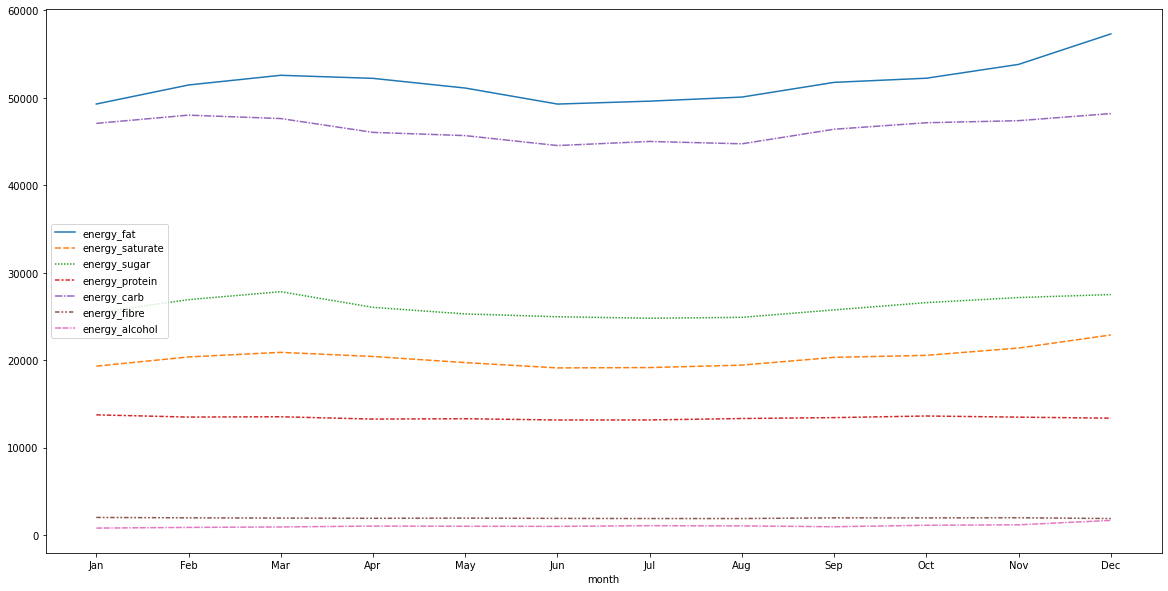

In [20]:
fig, ax = plt.subplots(figsize = (20,10))

g = sns.lineplot(data = osward_months.groupby(by = "month").sum()[nutrients], ax = ax)
plt.show()

#### Some Regression

In [21]:
log_model_interaction_variable = smf.ols(formula='ethnicity_bame_2011 ~ energy_fat + energy_saturate + energy_sugar + energy_protein + energy_carb + energy_fibre + energy_alcohol',data=lsoa_combined_year)
res = log_model_interaction_variable.fit()

# Print thes summary output provided by the library.
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     ethnicity_bame_2011   R-squared:                       0.481
Model:                             OLS   Adj. R-squared:                  0.480
Method:                  Least Squares   F-statistic:                     512.0
Date:                 Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                         23:13:40   Log-Likelihood:                -27322.
No. Observations:                 3874   AIC:                         5.466e+04
Df Residuals:                     3866   BIC:                         5.471e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5176.1760    13

In [22]:
log_model_interaction_variable = smf.ols(formula='annual_median_income_2011 ~ energy_fat + energy_saturate + energy_sugar + energy_protein + energy_carb + energy_fibre + energy_alcohol',data=lsoa_combined_year)
res = log_model_interaction_variable.fit()

# Print thes summary output provided by the library.
print(res.summary())

                                OLS Regression Results                               
Dep. Variable:     annual_median_income_2011   R-squared:                       0.495
Model:                                   OLS   Adj. R-squared:                  0.494
Method:                        Least Squares   F-statistic:                     540.7
Date:                       Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                               23:13:40   Log-Likelihood:                -40266.
No. Observations:                       3874   AIC:                         8.055e+04
Df Residuals:                           3866   BIC:                         8.060e+04
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

#### Barplots for different interesting attributes

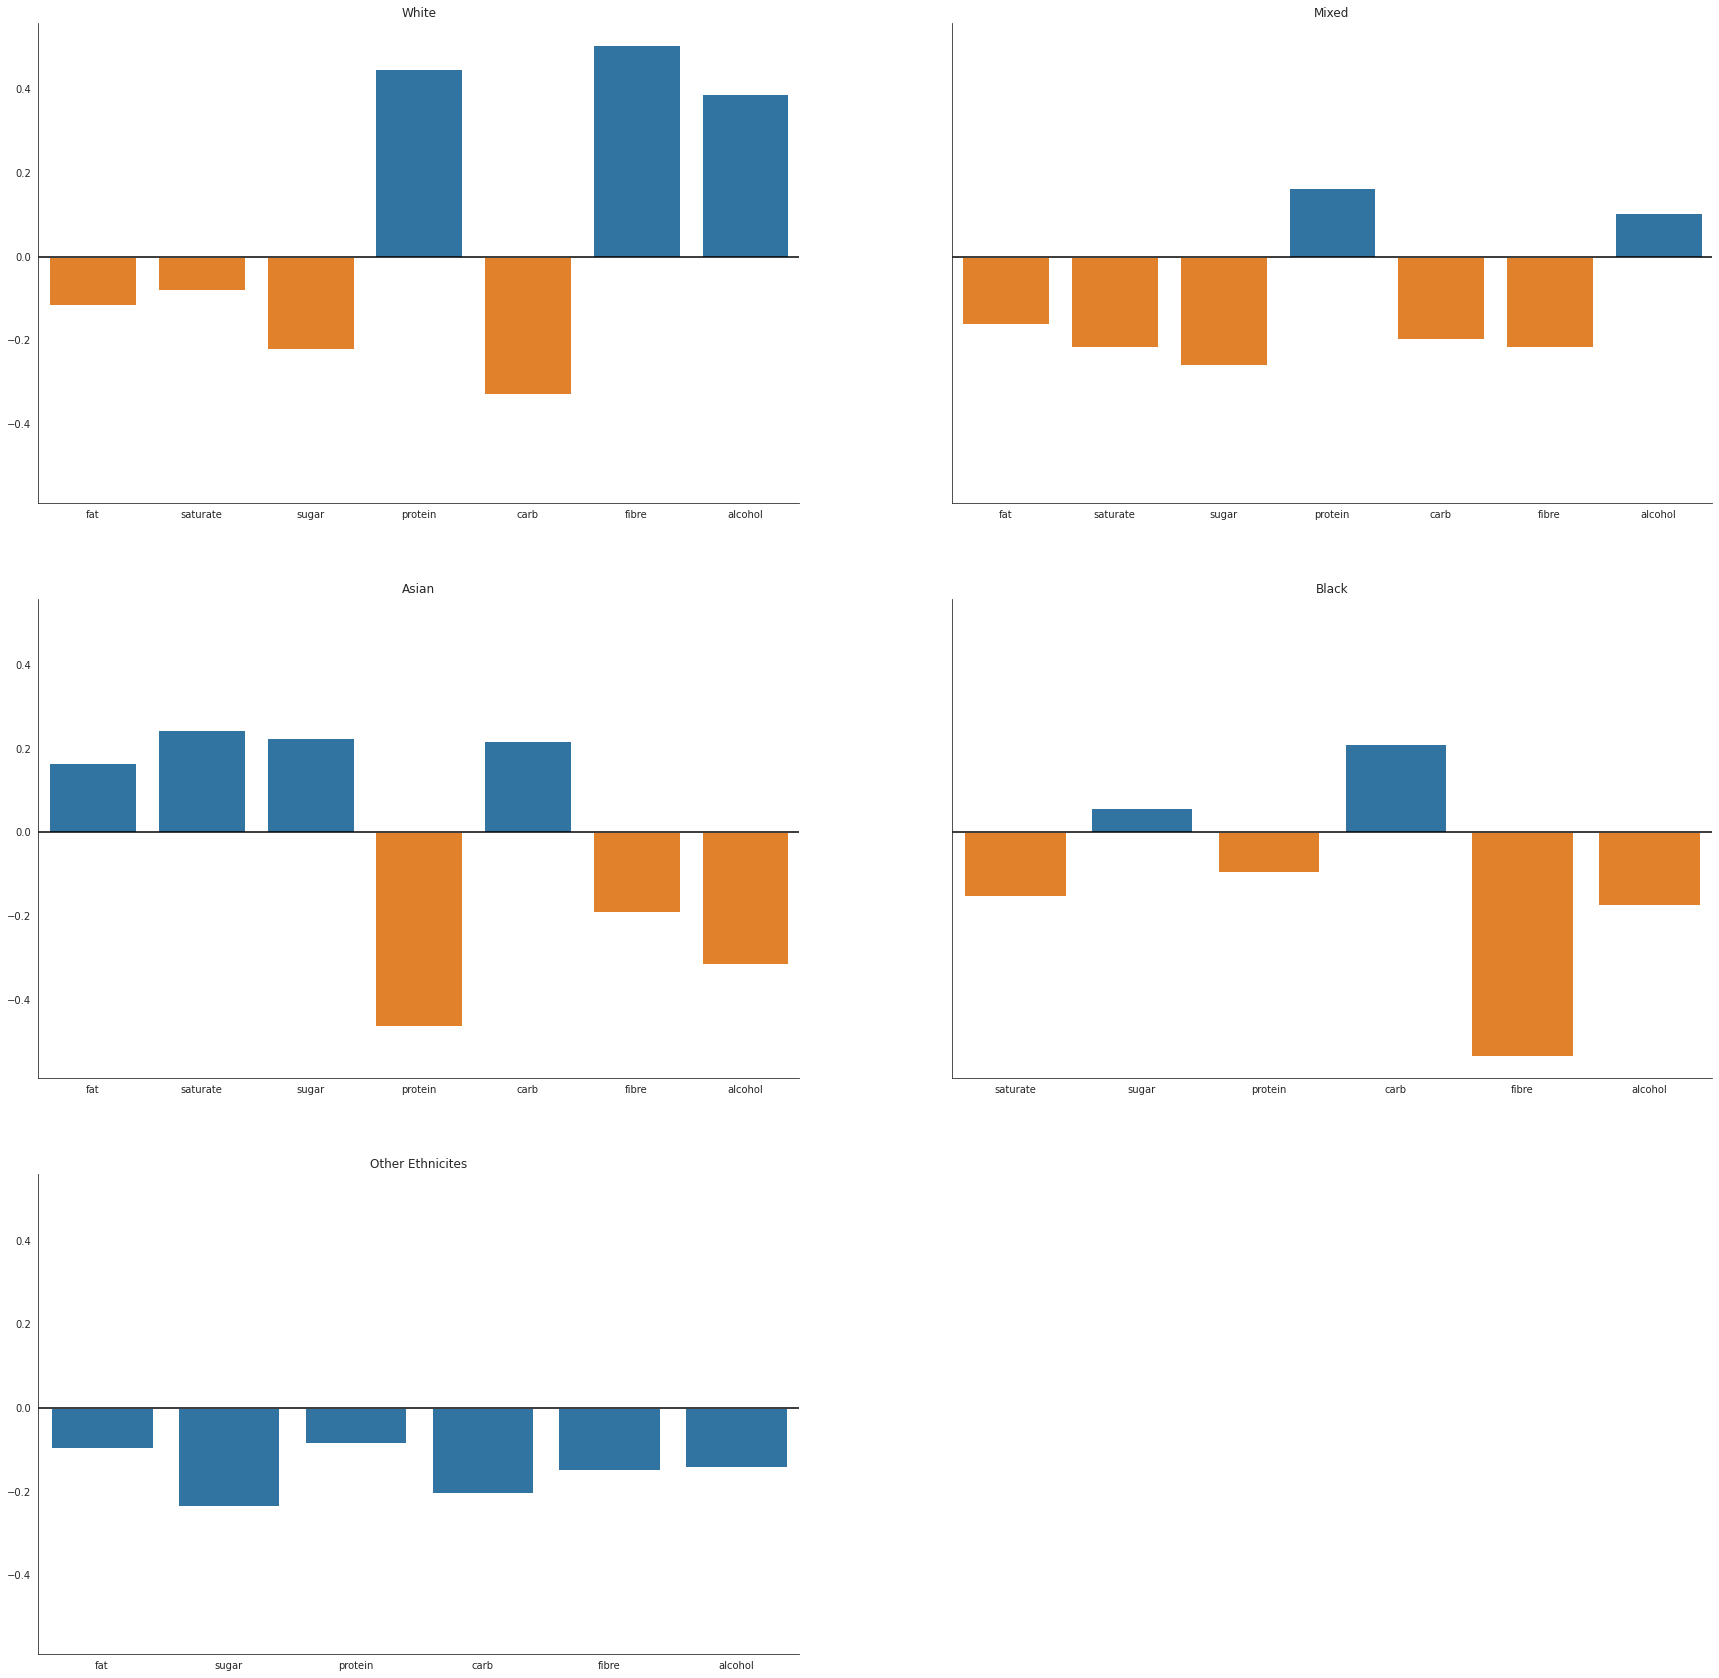

In [23]:
with sns.axes_style("white"): 

    f, axes = plt.subplots(3, 2, figsize=(30, 30), sharey = True)
    axes = axes.flatten()

    for ax, eth in zip(axes,ethnicities):
        correl = [(nutr, stats.spearmanr(a = lsoa_combined_year[eth], b = lsoa_combined_year[nutr]).correlation) for nutr in nutrients if stats.spearmanr(a = lsoa_combined_year[eth], b = lsoa_combined_year[nutr]).pvalue < 0.05]
        colors = [0 if c[1] >= 0 else 1 for c in correl]
        sns.barplot(x= [x[0].split("_")[1] for x in correl], y=[x[1] for x in correl], hue=colors, palette=sns.color_palette(), dodge=False, ax = ax)
        ax.axhline(0, ls='-', c = 'k')
        ax.get_legend().remove()
        ax.set_title(label_processor(eth))

    sns.despine(top = True, right = True)
    axes[-1].set_visible(False)

plt.show()

In [24]:
lsoa_combined_items = lsoa_combined_year[ethnicities + religions + nutrients + ["annual_median_income_2011"]].copy()
lsoa_combined_items.columns = [x.split("y_")[1].replace("_2011", "") for x in ethnicities] + ['Christian', 'Buddhist','Hindu','Jewish','Muslim','Sikh','No_religion','Other_religion']  + [x.split("_")[1] for x in  nutrients] + ["Median_Income"] 
 
# You could do this probably somewhat smarter 
# Encoding Data into a "Set" Dataset
for col in lsoa_combined_items.columns:
    lower  =  lsoa_combined_items[col].quantile(0.25)
    middle =  lsoa_combined_items[col].quantile(0.5)
    higher =  lsoa_combined_items[col].quantile(0.75)
    lsoa_combined_items[col + "_Low"] = lsoa_combined_items[col].apply(lambda x : x < lower)
    lsoa_combined_items[col + "_Low_to_Middle"] = lsoa_combined_items[col].apply(lambda x : x >= lower and x < middle)
    lsoa_combined_items[col + "_Middle_to_High"] = lsoa_combined_items[col].apply(lambda x :  x < higher and x > middle)
    lsoa_combined_items[col + "_High"] = lsoa_combined_items[col].apply(lambda x : x > higher )
    lsoa_combined_items = lsoa_combined_items.drop(col, axis = 1)
    

# Given the structure of the information, low support is indemic
frequent_itemsets = apriori(lsoa_combined_items, min_support = 0.05, use_colnames = True)

# Use Association Rules as an "explainable" Model
cleaned_names = [x.split("_")[1] for x in nutrients]
cleaned_names = [x + "_High" for x in cleaned_names] + [x + "_Low" for x in cleaned_names] + [x + "Low_to_Middle" for x in cleaned_names]+ [x + "Middle_to_High" for x in cleaned_names]
nutrient_sets = set(cleaned_names)

rules_association = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
rules_association[rules_association.apply(lambda x : True if x["antecedents"].issubset(nutrient_sets) and not x["consequents"].issubset(nutrient_sets) else False, axis = 1)].sort_values(by = "confidence", ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3798,"(protein_Low, saturate_High, carb_High)",(asian_High),0.065307,0.250129,0.053691,0.822134,3.286841,0.037356,4.215941
4417,"(protein_Low, saturate_High, carb_High)",(Other_religion_Low),0.065307,0.248064,0.053433,0.818182,3.298269,0.037233,4.135648
3786,"(protein_Low, fat_High, carb_High)",(asian_High),0.064533,0.250129,0.052659,0.816000,3.262316,0.036517,4.075386
4405,"(protein_Low, fat_High, carb_High)",(Other_religion_Low),0.064533,0.248064,0.051884,0.804000,3.241099,0.035876,3.836408
7808,"(carb_High, protein_Low, saturate_High)","(asian_High, Other_religion_Low)",0.065307,0.175271,0.052401,0.802372,4.577890,0.040954,4.173129
3763,"(protein_Low, fat_High, saturate_High)",(asian_High),0.077697,0.250129,0.061951,0.797342,3.187723,0.042517,3.700183
7769,"(carb_High, fat_High, protein_Low)","(asian_High, Other_religion_Low)",0.064533,0.175271,0.051110,0.792000,4.518716,0.039799,3.965043
7832,"(protein_Low, saturate_High, sugar_High, fat_H...",(asian_High),0.064791,0.250129,0.050852,0.784861,3.137822,0.034646,3.485511
2487,"(protein_Low, fat_High, carb_High)",(white_Low),0.064533,0.250129,0.050336,0.780000,3.118390,0.034194,3.408504
1449,"(fibre_High, carb_Low)",(Median_Income_High),0.100671,0.250129,0.078472,0.779487,3.116340,0.053291,3.400577


In [25]:
X = lsoa_combined_year[nutrients]
y = lsoa_combined_year['annual_median_income_2011']
n_estimators =  [75,100,200,250]
max_features = ["auto", "sqrt"]

    
for x in tqdm(it.product(n_estimators,max_features)): 
    
    print("\n", x)
    random_forest = RandomForestRegressor(n_estimators = x[0], max_features = x[1])
    print(cross_val_score(estimator = random_forest, X = X, y = y, cv = 20, n_jobs = -1).mean())
    

0it [00:00, ?it/s]


 (75, 'auto')


1it [00:14, 14.33s/it]

0.498946498765661

 (75, 'sqrt')


2it [00:18, 11.32s/it]

0.4993627201547827

 (100, 'auto')


3it [00:28, 11.03s/it]

0.49699588158279917

 (100, 'sqrt')


4it [00:34,  9.31s/it]

0.5029243157403787

 (200, 'auto')


5it [00:54, 12.53s/it]

0.5036080986090028

 (200, 'sqrt')


5it [01:01, 12.22s/it]


KeyboardInterrupt: 

In [ ]:
X = lsoa_combined_year[nutrients]
y = lsoa_combined_year['annual_median_income_2011']
n_estimators = [20,50,100,200,250]
learning_rate = [0.1, 0.05, 0.01]

for x in tqdm(it.product(n_estimators, learning_rate)): 
    
    print("\n", x)
    lin_regression = LinearRegression()
    ada = AdaBoostRegressor(base_estimator = lin_regression,  n_estimators = x[0], loss = "linear", learning_rate = x[1]) 
    print(cross_val_score(estimator = ada, X = X, y = y, cv = 20, n_jobs = -1).mean())
    

In [ ]:
# Shuffle Split 
x_train, x_test , y_train, y_test = train_test_split(lsoa_combined_year[nutrients], lsoa_combined_year['annual_median_income_2011'], random_state=0) 
# The Ada Pipeline 
ada_pipeline = pipeline_factory(scaler = StandardScaler(), model = AdaBoostRegressor(base_estimator = LinearRegression()), x_train = x_train, y_train = y_train)

ada_pipeline.score(x_test, y_test)

In [ ]:
# Shuffle Split 
x_train, x_test , y_train, y_test = train_test_split(msoa_combined_year[nutrients], msoa_combined_year['annual_median_income_2011'], random_state=0) 
# The Ada Pipeline 
ada_pipeline = pipeline_factory(scaler = StandardScaler(), model = AdaBoostRegressor(base_estimator = LinearRegression()), x_train = x_train, y_train = y_train)

ada_pipeline.score(x_test, y_test)

In [ ]:

X = msoa_combined_year[nutrients]
y = msoa_combined_year['annual_median_income_2011']

n_estimators =  [75,100,200,250]
max_features = ["auto", "sqrt"]

for x in tqdm(it.product(n_estimators,max_features)): 
    print("\n", x)
    random_forest = RandomForestRegressor(n_estimators = x[0], max_features = x[1])
    print(cross_val_score(estimator = random_forest, X = X, y = y, cv = 20, n_jobs = -1).mean())
    

In [ ]:
X = msoa_combined_year[nutrients]
y = msoa_combined_year['annual_median_income_2011']
n_estimators = [20,50,100,200,250]
learning_rate = [0.1, 0.05, 0.01]

for x in tqdm(it.product(n_estimators, learning_rate)): 
    print("\n", x)
    lin_regression = LinearRegression()
    ada = AdaBoostRegressor(base_estimator = lin_regression,  n_estimators = x[0], loss = "linear", learning_rate = x[1]) 
  
    print(cross_val_score(estimator = ada, X = X, y = y, cv = 20, n_jobs = -1).mean())
    

In [ ]:
msoa_combined_items = msoa_combined_year[ethnicities + religions + nutrients + ["annual_median_income_2011"]].copy()
msoa_combined_items.columns = [x.split("y_")[1].replace("_2011", "") for x in ethnicities] + ['Christian', 'Buddhist','Hindu','Jewish','Muslim','Sikh','No_religion','Other_religion']  + [x.split("_")[1] for x in  nutrients] + ["Median_Income"] 
 
# You could do this probably somewhat smarter 
# Encoding Data into a "Set" Dataset

for col in msoa_combined_items.columns:
    lower  =  msoa_combined_items[col].quantile(0.25)
    middle =  msoa_combined_items[col].quantile(0.5)
    higher =  msoa_combined_items[col].quantile(0.75)
    msoa_combined_items[col + "_Low"] = msoa_combined_items[col].apply(lambda x : x < lower)
    msoa_combined_items[col + "_Low_to_Middle"] = msoa_combined_items[col].apply(lambda x : x >= lower and x < middle)
    msoa_combined_items[col + "_Middle_to_High"] = msoa_combined_items[col].apply(lambda x :  x < higher and x > middle)
    msoa_combined_items[col + "_High"] = msoa_combined_items[col].apply(lambda x : x > higher)
    msoa_combined_items = msoa_combined_items.drop(col, axis = 1)
    

# Given the structure of the information, low support is indemic
frequent_itemsets = apriori(msoa_combined_items, min_support = 0.05, use_colnames = True)

# Use Association Rules as an "explainable" Model
cleaned_names = [x.split("_")[1] for x in nutrients]
cleaned_names = [x + "_High" for x in cleaned_names] + [x + "_Low" for x in cleaned_names] + [x + "Low_to_Middle" for x in cleaned_names]+ [x + "Middle_to_High" for x in cleaned_names]
nutrient_sets = set(cleaned_names)

rules_association = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
rules_association[rules_association.apply(lambda x : True if x["antecedents"].issubset(nutrient_sets) and not x["consequents"].issubset(nutrient_sets) else False, axis = 1)].sort_values(by = "confidence", ascending = False).head(20)

In [ ]:
log_model_interaction_variable = smf.ols(formula='ethnicity_bame_2011 ~ energy_fat + energy_saturate + energy_sugar + energy_protein + energy_carb + energy_fibre + energy_alcohol',data=msoa_combined_year)
res = log_model_interaction_variable.fit()

# Print thes summary output provided by the library.
print(res.summary())

In [ ]:
log_model_interaction_variable = smf.ols(formula='annual_median_income_2011 ~ energy_fat + energy_saturate + energy_sugar + energy_protein + energy_carb + energy_fibre + energy_alcohol',data=msoa_combined_year)
res = log_model_interaction_variable.fit()

# Print thes summary output provided by the library.
print(res.summary())

In [ ]:
with sns.axes_style("white"): 

    f, axes = plt.subplots(3, 2, figsize=(30, 30))
    axes = axes.flatten()

    for ax, eth in zip(axes,ethnicities):
        correl = [(nutr, stats.spearmanr(a = msoa_combined_year[eth], b = msoa_combined_year[nutr]).correlation) for nutr in products if stats.spearmanr(a = msoa_combined_year[eth], b = msoa_combined_year[nutr]).pvalue < 0.05]
        colors = [0 if c[1] >= 0 else 1 for c in correl]
        sns.barplot(x= [x[0].split("_")[1] for x in correl], y=[x[1] for x in correl], hue=colors, palette=sns.color_palette(), dodge=False, ax = ax)
        ax.axhline(0, ls='-', c = 'k')
        ax.get_legend().remove()
        ax.set_title(eth.split("perc")[0].replace("_", " "))

    sns.despine(top = True, right = True)
    axes[-1].set_visible(False)

plt.show()



In [ ]:
msoa_combined_items = msoa_combined_year[ethnicities + religions + products + ["annual_median_income_2011"]].copy()
msoa_combined_items.columns = [x.split("y_")[1].replace("_2011", "") for x in ethnicities] + ['Christian', 'Buddhist','Hindu','Jewish','Muslim','Sikh','No_religion','Other_religion']  + [x.split("_")[1] for x in products] + ["Median_Income"] 
 
# You could do this probably somewhat smarter 
# Encoding Data into a "Set" Dataset

for col in msoa_combined_items.columns:
    lower  =  msoa_combined_items[col].quantile(0.25)
    middle =  msoa_combined_items[col].quantile(0.5)
    higher =  msoa_combined_items[col].quantile(0.75)
    msoa_combined_items[col + "_Low"] = msoa_combined_items[col].apply(lambda x : x < lower)
    msoa_combined_items[col + "_Low_to_Middle"] = msoa_combined_items[col].apply(lambda x : x >= lower and x < middle)
    msoa_combined_items[col + "_Middle_to_High"] = msoa_combined_items[col].apply(lambda x :  x < higher and x > middle)
    msoa_combined_items[col + "_High"] = msoa_combined_items[col].apply(lambda x : x > higher)
    msoa_combined_items = msoa_combined_items.drop(col, axis = 1)
    

# Given the structure of the information, low support is indemic
frequent_itemsets = apriori(msoa_combined_items, min_support = 0.05, use_colnames = True)

# Use Association Rules as an "explainable" Model
cleaned_names = [x.split("_")[1] for x in products]
cleaned_names = [x + "_High" for x in cleaned_names] + [x + "_Low" for x in cleaned_names] + [x + "Low_to_Middle" for x in cleaned_names]+ [x + "Middle_to_High" for x in cleaned_names]
nutrient_sets = set(cleaned_names)

rules_association = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
rules_association[rules_association.apply(lambda x : True if x["antecedents"].issubset(nutrient_sets) and not x["consequents"].issubset(nutrient_sets) else False, axis = 1)].sort_values(by = "confidence", ascending = False).head(20)

In [ ]:
with sns.axes_style("white"): 

    f, axes = plt.subplots(3, 2, figsize=(30, 30))
    axes = axes.flatten()

    for ax, eth in zip(axes,education):
        correl = [(nutr, stats.spearmanr(a = msoa_combined_year[eth], b = msoa_combined_year[nutr]).correlation) for nutr in products if stats.spearmanr(a = msoa_combined_year[eth], b = msoa_combined_year[nutr]).pvalue < 0.05]
        colors = [0 if c[1] >= 0 else 1 for c in correl]
        sns.barplot(x= [x[0].split("_")[1] for x in correl], y=[x[1] for x in correl], hue=colors, palette=sns.color_palette(), dodge=False, ax = ax)
        ax.axhline(0, ls='-', c = 'k')
        ax.get_legend().remove()
        ax.set_title(eth.split("perc")[0].replace("_", " "))

    sns.despine(top = True, right = True)

plt.show()

In [ ]:
msoa_combined_items = msoa_combined_year[ethnicities + products + education + ["annual_median_income_2011"]].copy()
msoa_combined_items.columns = [x.split("y_")[1].replace("_2011", "") for x in ethnicities] + [x.split("_")[1] for x in products] + [x.replace("qualification_", "", 1).replace("_2011", "") for x in education]  + ["Median_Income"] 
 
# You could do this probably somewhat smarter 
# Encoding Data into a "Set" Dataset

for col in msoa_combined_items.columns:
    lower  =  msoa_combined_items[col].quantile(0.25)
    middle =  msoa_combined_items[col].quantile(0.5)
    higher =  msoa_combined_items[col].quantile(0.75)
    msoa_combined_items[col + "_Low"] = msoa_combined_items[col].apply(lambda x : x < lower)
    msoa_combined_items[col + "_Low_to_Middle"] = msoa_combined_items[col].apply(lambda x : x >= lower and x < middle)
    msoa_combined_items[col + "_Middle_to_High"] = msoa_combined_items[col].apply(lambda x :  x < higher and x > middle)
    msoa_combined_items[col + "_High"] = msoa_combined_items[col].apply(lambda x : x > higher)
    msoa_combined_items = msoa_combined_items.drop(col, axis = 1)
    

print("Computing Frequent Itemset ...")
# Given the structure of the information, low support is indemic
frequent_itemsets = apriori(msoa_combined_items, min_support = 0.1, use_colnames = True)



# Use Association Rules as an "explainable" Model
cleaned_names = [x.split("_")[1] for x in products]
cleaned_names = [x + "_High" for x in cleaned_names] + [x + "_Low" for x in cleaned_names] + [x + "Low_to_Middle" for x in cleaned_names]+ [x + "Middle_to_High" for x in cleaned_names]
nutrient_sets = set(cleaned_names)
print("Computing Association Rules ...")
rules_association = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
print("Cleaning Rule Set for desiered Rules ...")
rules_association[rules_association.apply(lambda x : True if x["antecedents"].issubset(nutrient_sets) and not x["consequents"].issubset(nutrient_sets) else False, axis = 1)].sort_values(by = "confidence", ascending = False).head(20)

In [ ]:
msoa_combined_items = msoa_combined_year[ethnicities + nutrients + education + ["annual_median_income_2011"]].copy()
msoa_combined_items.columns = [x.split("y_")[1].replace("_2011", "") for x in ethnicities] + [x.split("_")[1] for x in nutrients] + [x.replace("qualification_", "", 1).replace("_2011", "") for x in education] + ["Median_Income"] 
 
# You could do this probably somewhat smarter 
# Encoding Data into a "Set" Dataset

for col in msoa_combined_items.columns:
    lower  =  msoa_combined_items[col].quantile(0.25)
    middle =  msoa_combined_items[col].quantile(0.5)
    higher =  msoa_combined_items[col].quantile(0.75)
    msoa_combined_items[col + "_Low"] = msoa_combined_items[col].apply(lambda x : x < lower)
    msoa_combined_items[col + "_Low_to_Middle"] = msoa_combined_items[col].apply(lambda x : x >= lower and x < middle)
    msoa_combined_items[col + "_Middle_to_High"] = msoa_combined_items[col].apply(lambda x :  x < higher and x > middle)
    msoa_combined_items[col + "_High"] = msoa_combined_items[col].apply(lambda x : x > higher)
    msoa_combined_items = msoa_combined_items.drop(col, axis = 1)
    

print("Computing Frequent Itemset ...")
# Given the structure of the information, low support is indemic
frequent_itemsets = apriori(msoa_combined_items, min_support = 0.1, use_colnames = True)



# Use Association Rules as an "explainable" Model
cleaned_names = [x.split("_")[1] for x in nutrients]
cleaned_names = [x + "_High" for x in cleaned_names] + [x + "_Low" for x in cleaned_names] + [x + "Low_to_Middle" for x in cleaned_names]+ [x + "Middle_to_High" for x in cleaned_names]
nutrient_sets = set(cleaned_names)
print("Computing Association Rules ...")
rules_association = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
print("Cleaning Rule Set for desiered Rules ...")
rules_association[rules_association.apply(lambda x : True if x["antecedents"].issubset(nutrient_sets) and not x["consequents"].issubset(nutrient_sets) else False, axis = 1)].sort_values(by = "confidence", ascending = False).head(20)

https://pypi.org/project/pyarmviz/

In [ ]:
# Calculate spiral coordinates for the Xmas tree
theta = np.linspace(-8 * np.pi, 8 * np.pi, 200) 
z = np.linspace(-3, 0, 200)
r = 5
x = r * np.sin(theta)*z
y = r * np.cos(theta)*z
 
# Use matplotib and its OOP interface to draw it 
fig = plt.figure(figsize  = (15,15)) # Create figure
fig.set
ax = fig.gca(projection='3d') # It's a 3D Xmas tree!
ax.view_init(15, 0) # Set a nice view angle
ax._axis3don = False # Hide the 3d axes
 
# Plot the Xmas tree as a line
ax.plot(x, y, z,
        c='green', linewidth=2.5)
 
# Every Xmas tree needs a star
ax.scatter(0, 0, 0.2,
           c='red', s=250, marker='*')
 
# Type here your best whishes
ax.set_title(u"¡Feliz Navidad!")
 
plt.show()

In [ ]:
correl = [(group, stats.spearmanr(a = msoa_combined_year["representativeness_norm"], b = msoa_combined_year[group]).correlation) for group in (["annual_median_income_2011"] + ethnicities + education) if stats.spearmanr(a = msoa_combined_year["representativeness_norm"], b = msoa_combined_year[group]).pvalue < 0.05]

fig = go.Figure()
fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] >= 0], y=[c[1] for c in correl if c[1] >= 0],
                    marker_color= color_tesco_blue,
                    name='positives'))

fig.add_trace(go.Bar(x=[label_processor(c[0]) for c in correl if c[1] < 0], y=[c[1] for c in correl if c[1] < 0],
                    marker_color= color_tesco_red,
                    name='negatives'))

fig.update_layout(template = "plotly_white")
fig.show()
fig.write_html("../fierceeagle.github.io/_includes/Correlation_Representativness_Norm_White.html")

In [ ]:
bar_plot_factory(dataframe = msoa_combined_year,
                 category_socio_economics = ethnicities,
                 category_nutrion = nutrients,
                 html_name = "Correlation_Nutirents_Ethnicity",
                 output_html = True,
                 auto_commit = True).show()

In [ ]:
three_D_plot_factory(dataframe = msoa_combined_year,
                     x_axis ="annual_median_income_2011" ,
                     y_axis = "perc_ethnicity_white_2011",
                     title = "Interaction between Household Income, Ethnicity and Alcohol Consumption",
                     x_title = "Percentage White Inhabitants",
                     y_title = "Median Household Income",
                     z_title = "Kcal in the AAP by Alcohol",
                     aggfunc = np.mean, 
                     z_axis = "energy_alcohol",
                     html_name = "3D_Plot_White_Median_Income_Alcohol",
                     output_html = True,
                     auto_commit = True ,
                     quantiles = [0,.125,.25,.375,.5, .625,.75,.875,1]
                     ).show() 

In [ ]:
three_D_multi_plot_factory(
                     dataframe = msoa_combined_year,
                     x_axis  ="annual_median_income_2011" ,
                     y_axis  = "perc_ethnicity_white_2011",
                     title   = "Interaction between Household Income, Ethnicity and Alcohol Consumption",
                     x_title = "Percentage White Inhabitants",
                     y_title = "Median Household Income",
                     z_title = "Kcal in the AAP by Alcohol",
                     aggfunc = np.mean, 
                     category_z  = ["f_spirits", "f_wine", "f_beer"],
                     html_name   = "3D_Multi_Plot_Test",
                     output_html = True,
                     auto_commit = True,
                     quantiles   = [0,.125,.25,.375,.5, .625,.75,.875,1],
                     ).show() 

In [ ]:
geo_path = "Geo_Data"

scatter_top_four  = pd.read_csv("Geo_Data/top_four_store_locations_greater_london.csv")
scatter_top_four["size"] = 10
scatter_top_four["Store Name"] = scatter_top_four["BusinessName"]

fig = px.scatter_mapbox(scatter_top_four, lat="Latitude", lon="Longitude", hover_name="BusinessName", mapbox_style="carto-positron",
                        zoom = 10, center = {"lat": 51.509865, "lon": -0.118092},
                        opacity=0.65, 
                        size = "size",
                        color_discrete_map = {"Asda": "#78BE20" ,"Sainsbury" : "#ED8B01", "Morrisons":"#00563F", "Tesco":"#00539F"},
                        size_max = 7,
                        color="Store Name")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.write_html("../fierceeagle.github.io/_includes/Store_Locations_London.html")

In [ ]:
rules = rules_association[rules_association.apply(lambda x : True if x["antecedents"].issubset(nutrient_sets) and not x["consequents"].issubset(nutrient_sets) else False, axis = 1)].sort_values(by = "confidence", ascending = False).head(5)
rules["antecedents"] = rules.apply(lambda x: ''.join([x.capitalize() + "<br>" for x in list(x["antecedents"])]).replace("_high", u" \u21D7").replace("_low", u" \u21D8") , axis = 1)
rules["consequents"] = rules.apply(lambda x: ' '.join([x.capitalize() + "<br>" for x in list(x["consequents"])]).replace("_high", u" \u21D7").replace("_low", u" \u21D8").replace("_", " "), axis = 1)
rules[["support","confidence", "lift"]] = rules[["support","confidence", "lift"]].applymap(lambda x : round(x,3))
rules = rules[["antecedents", "consequents", "support","confidence", "lift"]]
fig = ff.create_table(rules, height_constant=60)
fig.show()
fig.write_html("../fierceeagle.github.io/_includes/AssociationRuleTable_Nutrients.html")

#### Decision Trees

In [ ]:
baumbart = DecisionTreeClassifier()

X = msoa_combined_items[[x.split("_")[1] + "_Low" for x in products] + [x.split("_")[1] + "_Low_to_Middle" for x in products] + [x.split("_")[1] + "_Middle_to_High" for x in products] + [x.split("_")[1] + "_High" for x in products]]
y = msoa_combined_items["white_High"]

cross_val_score(estimator = baumbart, X = X, y = y, cv = 20, n_jobs = -1)

In [158]:
def post_pruning_decision_tree_selector(df, y_label, n_bins = 5, cv = None, scorer = "accuracy"):
    X = df.drop(y_label,axis=1)
    y = df[y_label]
    y = bin_this(y, n_bins)
    
    clf = DecisionTreeClassifier(random_state=0)
    path = clf.cost_complexity_pruning_path(X, y)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    
    parameters = {'ccp_alpha':ccp_alphas}

    gsCV = GridSearchCV(DecisionTreeClassifier(random_state=0),parameters, n_jobs=-1)
    gsCV.fit(X,y)
    clf = gsCV.best_estimator_
    print (clf.best_score_, clf.best_params_)
    return clf, clf.best_score_, clf.best_params_
    #clfs = []
    #scores = []
    #for ccp_alpha in ccp_alphas:
    #    # seriously not sure about this
    #    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    #    score = cross_val_score(estimator = clf, X = X, y = y, cv = cv, scoring=accuracy, n_jobs = -1)
    #    clf.fit(X,y)
    #    clfs.append(clf)
    #    scores.append(score)
    #return clfs, ccp_alphas, scores

def bin_this(y, n_bins = 5):
    # same sized bins
    if type(y[0]) == np.int_ or type(y[0]) == np.float_:
        y_range = y.max() - y.min()
        bin_names = []
        for n in range(n_bins):
            bin_names.append([y.min() + (n/n_bins)*y_range,y.min() + ((n+1)/n_bins)*y_range])
        y_new = np.array([])

        for ix, x in enumerate(y):
            for bin_name in bin_names:
                if(bin_name[0] <= x and x < bin_name[1]):
                    y_new = np.append(y_new, str(bin_name))
            if (x == y.max()):
                y_new = np.append(y_new, str(bin_names[n_bins - 1]))               
        return y_new
    else: # for strings and arrays # not tested yet
        return [str(x) for x in y]

In [159]:
dataf = msoa_combined_year[ethnicities + ["energy_alcohol"]]
clf, score, alpha = post_pruning_decision_tree_selections(dataf, y_label = "energy_alcohol", cv=5)

0.5757062146892655 {'ccp_alpha': 0.006446571248227714}


In [160]:
text_representation = export_text(clf)
print(text_representation)

|--- feature_0 <= 51.95
|   |--- feature_0 <= 22.30
|   |   |--- class: [0.6264612375508213, 1.152568626776501]
|   |--- feature_0 >  22.30
|   |   |--- class: [1.152568626776501, 1.6786760160021807]
|--- feature_0 >  51.95
|   |--- feature_4 <= 1.15
|   |   |--- class: [1.152568626776501, 1.6786760160021807]
|   |--- feature_4 >  1.15
|   |   |--- feature_0 <= 66.05
|   |   |   |--- feature_1 <= 6.85
|   |   |   |   |--- class: [1.152568626776501, 1.6786760160021807]
|   |   |   |--- feature_1 >  6.85
|   |   |   |   |--- class: [1.6786760160021807, 2.2047834052278605]
|   |   |--- feature_0 >  66.05
|   |   |   |--- feature_0 <= 80.60
|   |   |   |   |--- class: [1.6786760160021807, 2.2047834052278605]
|   |   |   |--- feature_0 >  80.60
|   |   |   |   |--- class: [1.6786760160021807, 2.2047834052278605]



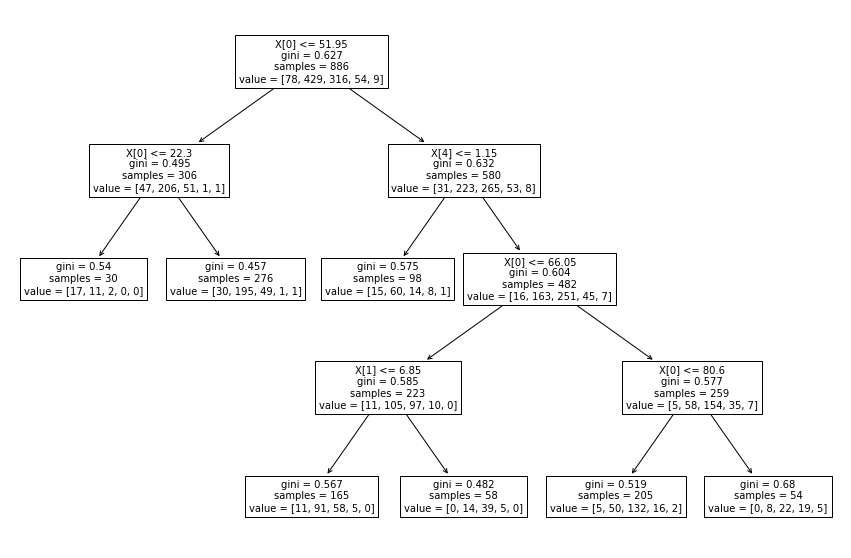

In [163]:
fig = plt.figure(figsize=(15,10))
viz = plot_tree(clf)

## Only Proper ML Following from here on out

In [ ]:
for x in msoa_combined_year.columns:
    print(x)